# Proyek Analisis Data: User Retention Cohort Analysis
- **Nama:** Resa Nurhalimah
- **Email:** resanrhlmh19@gmail.com

# Data Understanding

- Dataset yang digunakan dalam analisis ini adalah "Data Ritel Online", yang berisi informasi transaksi penjualan dari sebuah toko ritel online.
- Dataset ini berisi informasi transaksi penjualan yang terjadi selama periode tertentu.
- Data ini berguna untuk menganalisis perilaku pembelian pelanggan, tren penjualan, dan retensi pengguna.

## Key Performance Index

-  User Retention Rate: Persentase pengguna yang terus menggunakan produk dari waktu ke waktu.
- Churn Rate: Persentase pengguna yang berhenti menggunakan produk selama periode tertentu.
- Active Users (Daily/Monthly): Jumlah pengguna unik yang secara aktif menggunakan produk setiap hari atau setiap bulan.
- Avarage Session Duration: Berapa lama rata-rata pengguna menggunakan produk.
- Customer Lifetime Value (CLV): Total pendapatan yang diharapkan dari pengguna selama masa hidupnya.
- Repeat Purchase Rate: Persentase pengguna yang melakukan pembelian berulang.

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install pandas
!pip instal numpy
!pip install datetime
import pandas as pd
import numpy as np
import datetime as dt

ERROR: unknown command "instal" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 9.4 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
OnlineRetailData = pd.read_csv('Online Retail Data.csv')
OnlineRetailData

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


**Insight:**
- Dataset yang digunakan dalam analisis ini adalah Data Retail Online, yang berisi informasi transaksi penjualan dari sebuah toko ritel online.
- Dalam daset tersebut terdapat kolom order_id, customer_id, order_date, order_status, product_id, jumlah, price.

| No. | Kolom     | Deskripsi                                       |
|-----|-----------|-------------------------------------------------|
| 1.  | order_id   | Identifikasi unik untuk setiap pesanan|
| 2.  | customer_id    | Identifikasi unik untuk setiap pelanggan|
| 3.  | order_date    | Tanggal pemesanan dilakukan |
|4.| order_status|Status pemesanan (misalnya: dikirim atau dibatalkan).|
|5.|product_id| Identifikasi unik untuk setiap produk.|
|6.| jumlah|Jumlah produk yang dibeli dalam pesanan|
|7.|price|Harga per unir produk.|


### Assessing Data

In [ ]:
OnlineRetailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [ ]:
OnlineRetailData.isna().sum()

,0
order_id,0
product_code,0
product_name,2718
quantity,0
order_date,0
price,0
customer_id,100920


In [ ]:
print("Jumlah duplikasi:", OnlineRetailData.duplicated().sum())

Jumlah duplikasi: 6479


In [ ]:
OnlineRetailData.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [ ]:
nums = ['quantity', 'price',]

<ipython-input-9-f9ff6598e8f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=OnlineRetailData[nums[i]], palette='Spectral')
<ipython-input-9-f9ff6598e8f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=OnlineRetailData[nums[i]], palette='Spectral')


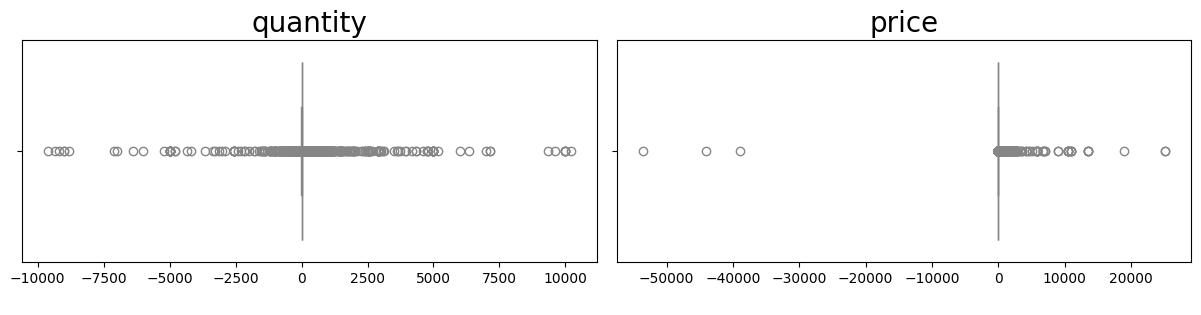

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.figure(figsize=(24,28))
for i in range(0,len(nums)):
    plt.subplot(10,4,i+1)
    sns.boxplot(x=OnlineRetailData[nums[i]], palette='Spectral')
    plt.title(nums[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

**Insight:**
- Terdapat kesalahan type data pada kolom order date dan Customer_id.
- Terdapat kolom yang berisi null pad akolom product_name, price, dan customer_id.
- terdapat data yang duplikat sejumlah 1956.
Terdapat data outliers pada kolom quantity dan price.
- Akan ditambahkan kolom year month, order_status dan amount untuk memudahka analisi.

### Cleaning Data

In [ ]:
OnlineRetailData_clean=OnlineRetailData.copy()
#menghapus semua baris tanpa customer_id
OnlineRetailData_clean = OnlineRetailData_clean[~OnlineRetailData_clean['customer_id'].isna()]
#mengkonversi kolom order_date menjadi datetime
OnlineRetailData_clean['order_date'] = OnlineRetailData_clean['order_date'].astype('datetime64[ns]')
#membuat kolom year_month
OnlineRetailData_clean['year_month'] = OnlineRetailData_clean['order_date'].dt.to_period('M')
#menghapus semua baris tanpa product_name
OnlineRetailData_clean = OnlineRetailData_clean[~OnlineRetailData_clean['product_name'].isna()]
#membuat semua product_name berhuruf kecil
OnlineRetailData_clean['product_name'] = OnlineRetailData_clean ['product_name'].str.lower()
#menghapus semua baris dengan product_code atau product_name test
OnlineRetailData_clean = OnlineRetailData_clean[~OnlineRetailData_clean['product_code'].str.lower().str.contains('test') & ~OnlineRetailData_clean['product_name'].str.contains('test ')]
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
OnlineRetailData_clean['order_status'] = np.where(OnlineRetailData_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
OnlineRetailData_clean['quantity'] = OnlineRetailData_clean['quantity'].abs()
# menghapus baris dengan price bernilai negatif
OnlineRetailData_clean = OnlineRetailData_clean[OnlineRetailData_clean['price']>0]
# membuat nilai amount, yaitu perkalian antara quantity dan price
OnlineRetailData_clean['amount'] = OnlineRetailData_clean['quantity'] * OnlineRetailData_clean['price']
# mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul
most_freq_product_name = OnlineRetailData_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
OnlineRetailData_clean = OnlineRetailData_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
OnlineRetailData_clean['product_name'] = OnlineRetailData_clean['most_freq_product_name']
OnlineRetailData_clean = OnlineRetailData_clean.drop(columns='most_freq_product_name')
# mengkonversi customer_id menjadi string
OnlineRetailData_clean['customer_id'] = OnlineRetailData_clean['customer_id'].astype(str)
# menghapus outlier
from scipy import stats
OnlineRetailData_clean = OnlineRetailData_clean[(np.abs(stats.zscore(OnlineRetailData_clean[['quantity','amount']]))<3).all(axis=1)]
OnlineRetailData_clean = OnlineRetailData_clean.reset_index(drop=True)
OnlineRetailData_clean

<ipython-input-10-4e56eb66f889>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlineRetailData_clean['order_date'] = OnlineRetailData_clean['order_date'].astype('datetime64[ns]')
<ipython-input-10-4e56eb66f889>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlineRetailData_clean['year_month'] = OnlineRetailData_clean['order_date'].dt.to_period('M')
<ipython-input-10-4e56eb66f889>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,8.50
...,...,...,...,...,...,...,...,...,...,...
358464,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,2010-12,delivered,1.25
358465,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,delivered,1.69
358466,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,delivered,1.69
358467,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,2010-12,delivered,9.90


In [ ]:
OnlineRetailData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358469 entries, 0 to 358468
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      358469 non-null  object        
 1   product_code  358469 non-null  object        
 2   product_name  358469 non-null  object        
 3   quantity      358469 non-null  int64         
 4   order_date    358469 non-null  datetime64[ns]
 5   price         358469 non-null  float64       
 6   customer_id   358469 non-null  object        
 7   year_month    358469 non-null  period[M]     
 8   order_status  358469 non-null  object        
 9   amount        358469 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 27.3+ MB


**Insight:**
- xxx
- xxx

## Membuat Users Retention Cohort

Agregat data transaksi ke bentuk summary total transaksi/order setiap pengguna setiap bulannya

In [ ]:
OnlineRetailData_Monthly = OnlineRetailData_clean.groupby(['customer_id', 'year_month'], as_index=False).agg(order_cnt=('order_id', 'nunique'))
OnlineRetailData_Monthly

,customer_id,year_month,order_cnt
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1
...,...,...,...
12039,18286.0,2010-06,1
12040,18286.0,2010-08,1
12041,18287.0,2010-05,1
12042,18287.0,2010-09,2


Membuat kolom sebagai Cohort dari pengguna, misalnya cohort bulan pertama kali berinteraksi

In [ ]:
OnlineRetailData_Monthly['cohort'] = OnlineRetailData_Monthly.groupby('customer_id')['year_month'].transform('min')
OnlineRetailData_Monthly

,customer_id,year_month,order_cnt,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
12039,18286.0,2010-06,1,2010-06
12040,18286.0,2010-08,1,2010-06
12041,18287.0,2010-05,1,2010-05
12042,18287.0,2010-09,2,2010-05


Hitung jarak bulan transaksi antara bulan pertama kali transaksi dan jumlahkan dengan 1 agar jarak bulan 0 menjadi 1 berarti bulan pertama, dst

In [ ]:
from operator import attrgetter
OnlineRetailData_Monthly['period_num'] = (OnlineRetailData_Monthly['year_month'] -
                                         OnlineRetailData_Monthly['cohort']).apply(attrgetter('n')) + 1
OnlineRetailData_Monthly

,customer_id,year_month,order_cnt,cohort,period_num
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12039,18286.0,2010-06,1,2010-06,1
12040,18286.0,2010-08,1,2010-06,3
12041,18287.0,2010-05,1,2010-05,1
12042,18287.0,2010-09,2,2010-05,5


Buat tabel pivot dengan index berupa cohort, kolom berupa jarak bulan, dan nilainya adalah banyaknya pengguna unik (Count unique dari ID pengguna)

In [ ]:
OnlineRetail_cohort_pivot= pd.pivot_table(OnlineRetailData_Monthly, index='cohort',columns='period_num',values='customer_id', aggfunc=pd.Series.nunique )
OnlineRetail_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,713.0,280.0,334.0,313.0,305.0,304.0,293.0,268.0,285.0,319.0,335.0,249.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,159.0,153.0,166.0,100.0,NaN
2010-03,528.0,146.0,158.0,145.0,140.0,123.0,149.0,186.0,193.0,96.0,NaN,NaN
2010-04,326.0,82.0,75.0,63.0,69.0,79.0,98.0,101.0,50.0,NaN,NaN,NaN
2010-05,274.0,55.0,50.0,52.0,52.0,72.0,67.0,43.0,NaN,NaN,NaN,NaN
2010-06,266.0,53.0,56.0,60.0,65.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,227.0,64.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Menghitung banyaknya pengguna di masing-masing cohort (pengguna yang pertama kali bertransaksi di bulan tertentu) dan bagi semua nilai dala tabel pivot tadi dengan nilai tersebut sesuai baris indexnya sebagai retention rate

In [ ]:
cohort_size = OnlineRetail_cohort_pivot.iloc[:, 0]
OnlineRetail_retention_cohort = OnlineRetail_cohort_pivot.divide(cohort_size, axis=0 )
cohort_size

,1
cohort,
2010-01,713.0
2010-02,461.0
2010-03,528.0
2010-04,326.0
2010-05,274.0
2010-06,266.0
2010-07,179.0
2010-08,160.0
2010-09,227.0


In [ ]:
OnlineRetail_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.392707,0.468443,0.438990,0.427770,0.426367,0.410940,0.375877,0.399719,0.447405,0.469846,0.349229
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.344902,0.331887,0.360087,0.216920,NaN
2010-03,1.0,0.276515,0.299242,0.274621,0.265152,0.232955,0.282197,0.352273,0.365530,0.181818,NaN,NaN
2010-04,1.0,0.251534,0.230061,0.193252,0.211656,0.242331,0.300613,0.309816,0.153374,NaN,NaN,NaN
2010-05,1.0,0.200730,0.182482,0.189781,0.189781,0.262774,0.244526,0.156934,NaN,NaN,NaN,NaN
2010-06,1.0,0.199248,0.210526,0.225564,0.244361,0.319549,0.146617,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.296089,0.167598,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.281938,0.264317,0.136564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


menampilkan tabel pivot yang sudah berisi nilai retention rate tersebut dalam heatmap

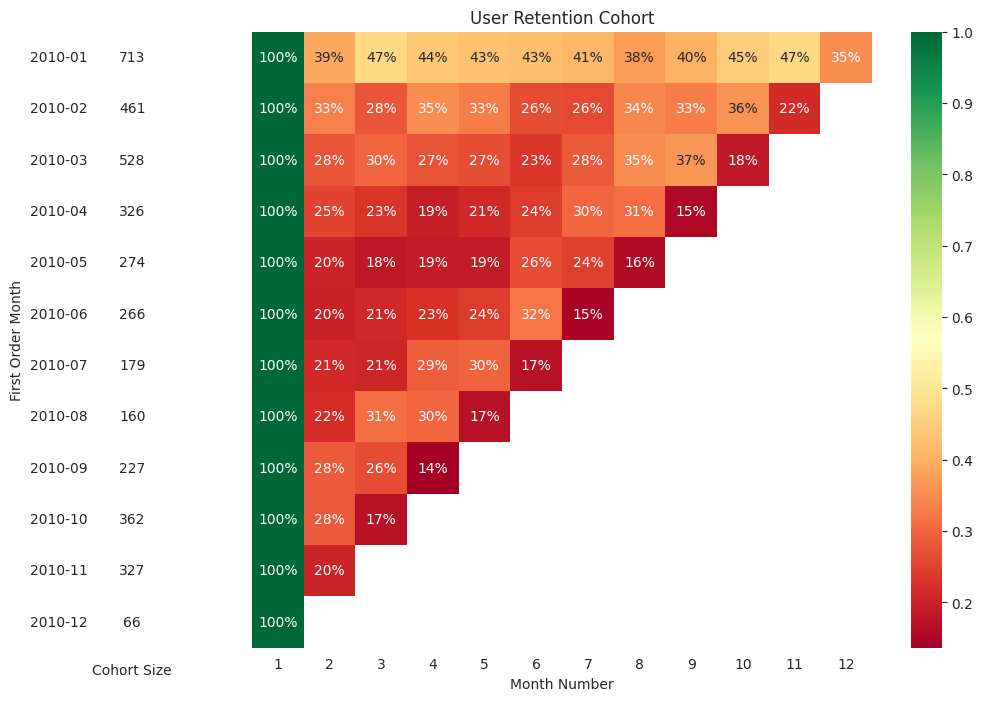

In [ ]:
!pip install matplotlib
!pip install seaborn

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(OnlineRetail_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

**Insight:**

Pada Januari 2010, sebanyak 713 pengguna baru pertama kali melakukan transaksi, menjadikannya kelompok pengguna (cohort) terbesar di antara periode lainnya. Menariknya, cohort ini menunjukkan kinerja yang luar biasa dengan retention rate tertinggi pada bulan kedua, mencapai 39%. Hal ini mencerminkan tingkat keberlanjutan yang sangat baik, menunjukkan bahwa hampir 4 dari 10 pengguna baru tetap aktif setelah bulan pertama. Insight ini memberikan indikasi kuat akan keberhasilan strategi akuisisi dan pengalaman pengguna yang diterapkan pada periode tersebut.Selain itu, cohort Januari 2010 menunjukkan loyalitas yang konsisten dengan retention rate stabil di angka sekitar 40% atau lebih selama beberapa bulan berikutnya. Namun, data ini juga mengungkapkan tantangan yang signifikan: mayoritas pengguna dari berbagai cohort lainnya tidak kembali melakukan transaksi, dengan retention rate yang tidak pernah melampaui 50%. Temuan ini menggarisbawahi pentingnya strategi retensi yang lebih efektif untuk mempertahankan basis pelanggan yang lebih besar dalam jangka panjang. Retention rate pada Desember 2010 menunjukkan tren yang mengkhawatirkan, karena tercatat sebagai yang terendah di antara semua cohort pengguna dibandingkan dengan bulan-bulan sebelumnya. Penurunan ini dapat menjadi indikator adanya masalah dalam mempertahankan pengguna, seperti perubahan perilaku pelanggan, penurunan kualitas layanan, atau kurangnya daya tarik dari promosi pada periode tersebut. Analisis lebih mendalam diperlukan untuk mengidentifikasi penyebab utama dan menyusun strategi perbaikan agar penurunan serupa tidak berulang di masa mendatang.